### Stock forecasting example

### Install yfinance package

In [1]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Read the stock

In [59]:
import yfinance as yf
ticker = 'SBIN.NS'
df = yf.download(tickers=ticker, period='5y', interval='1mo')
df.head() 

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-01,286.700012,302.000000,268.350006,295.899994,283.184814,314605179
2019-01-01,297.500000,307.500000,276.549988,293.649994,281.031464,354323797
2019-02-01,296.899994,302.700012,258.799988,269.049988,257.488586,408697355
2019-03-01,270.549988,339.649994,270.100006,320.750000,306.966980,472623392
2019-04-01,321.799988,332.450012,303.600006,309.950012,296.631042,380333752


In [60]:
df.shape

(60, 6)

In [61]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Plot the Adj Close data

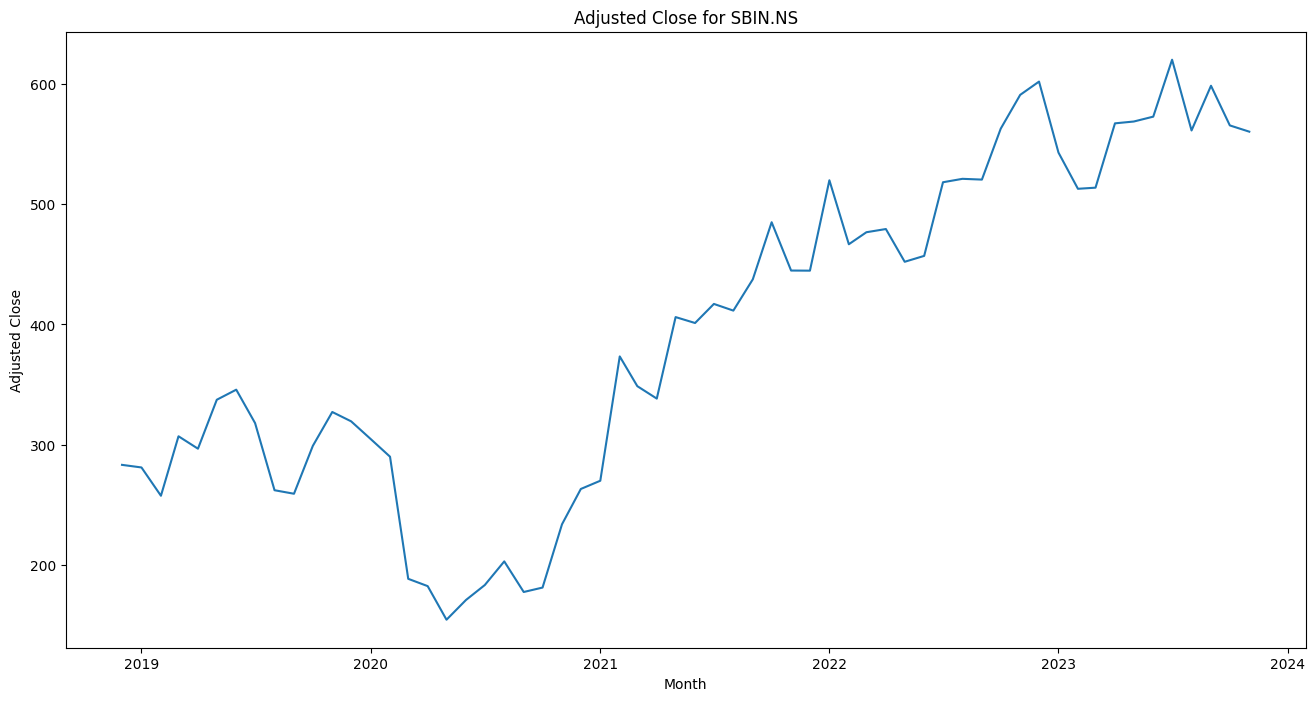

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'])
plt.xlabel('Month')
plt.ylabel('Adjusted Close')
plt.title(f'Adjusted Close for {ticker}')
plt.show()

### Decomposition

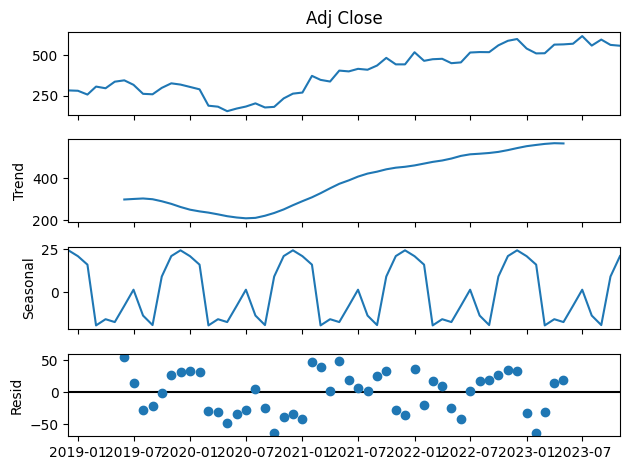

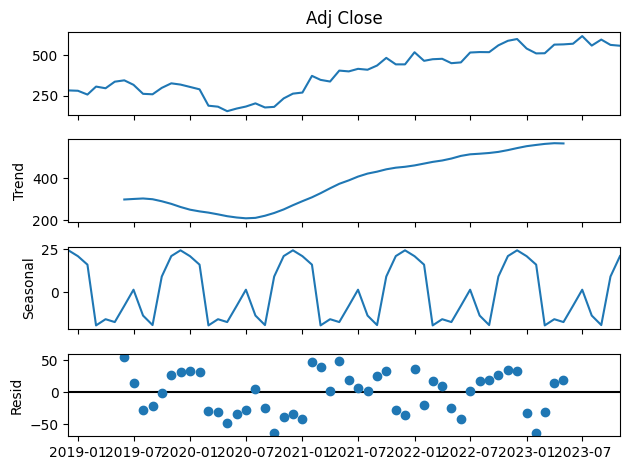

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(df['Adj Close'])
Q.plot()

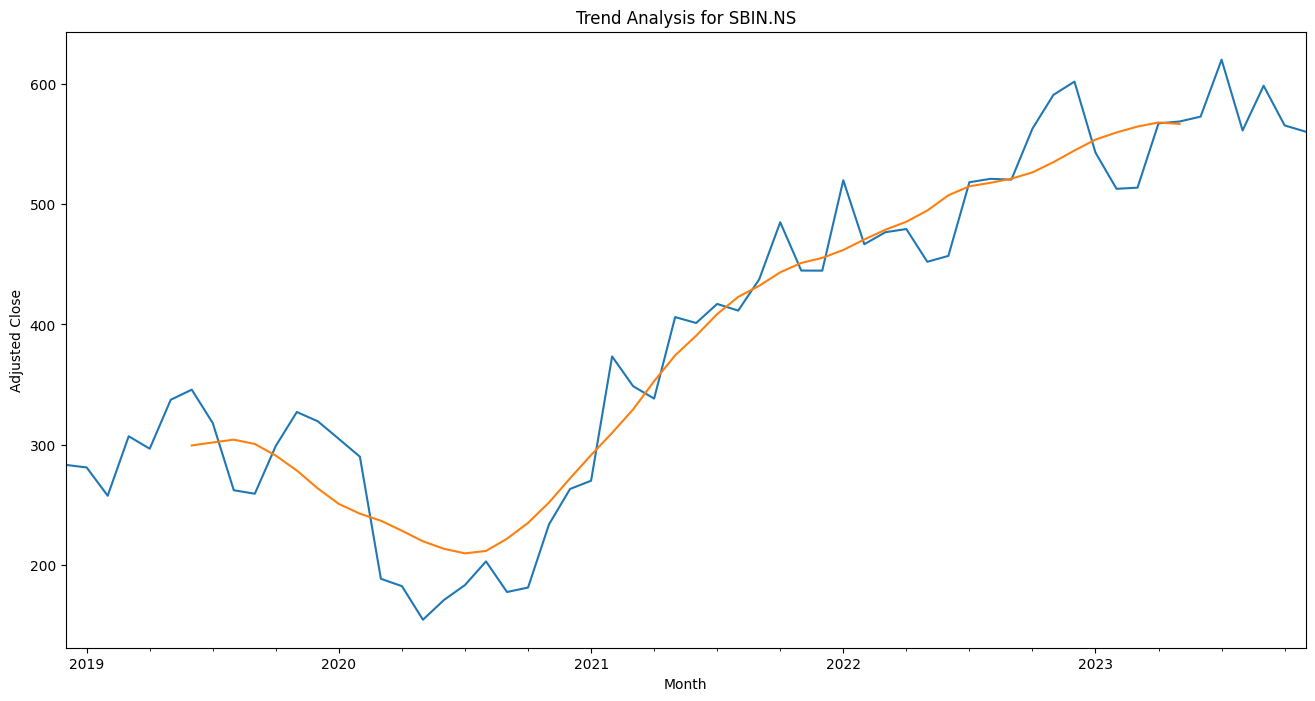

In [64]:
plt.figure(figsize=(16,8))
Q.observed.plot()
Q.trend.plot()
plt.xlabel('Month')
plt.ylabel('Adjusted Close')
plt.title(f'Trend Analysis for {ticker}')
plt.show()

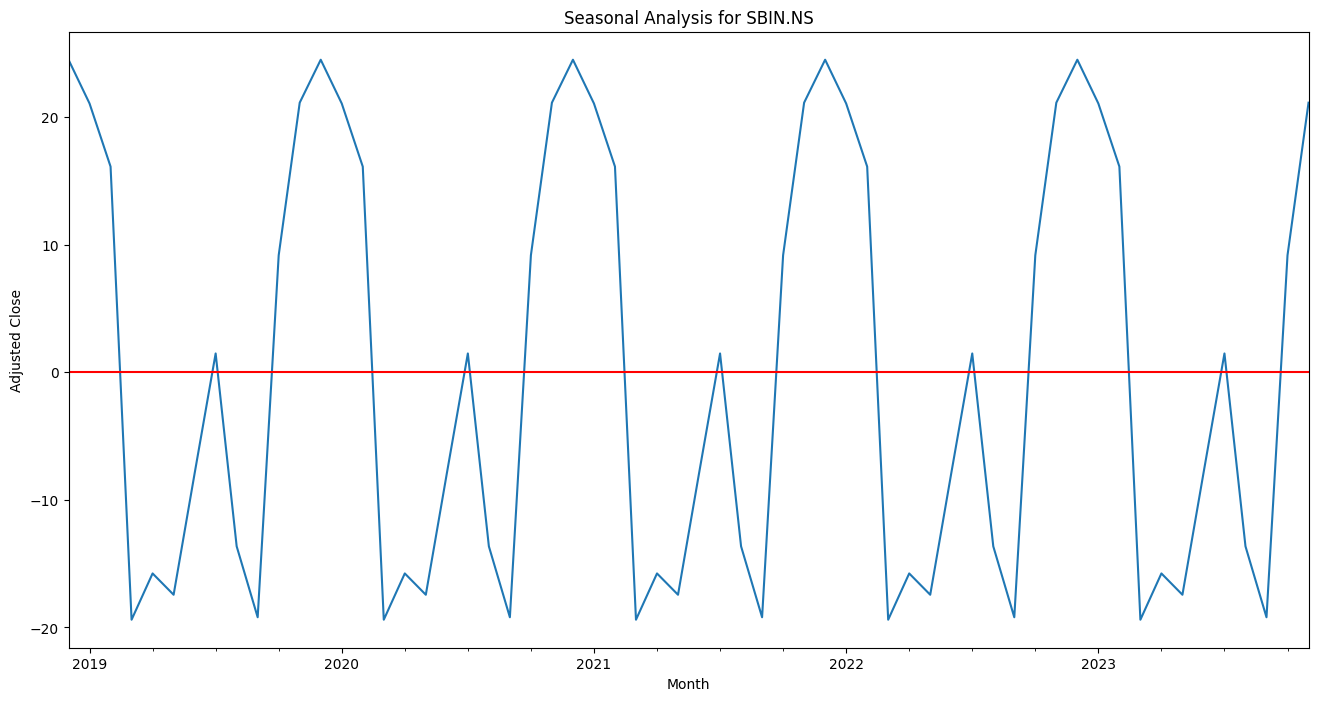

In [65]:
plt.figure(figsize=(16,8))
Q.seasonal.plot()
plt.axhline(color='red')
plt.xlabel('Month')
plt.ylabel('Adjusted Close')
plt.title(f'Seasonal Analysis for {ticker}')
plt.show()

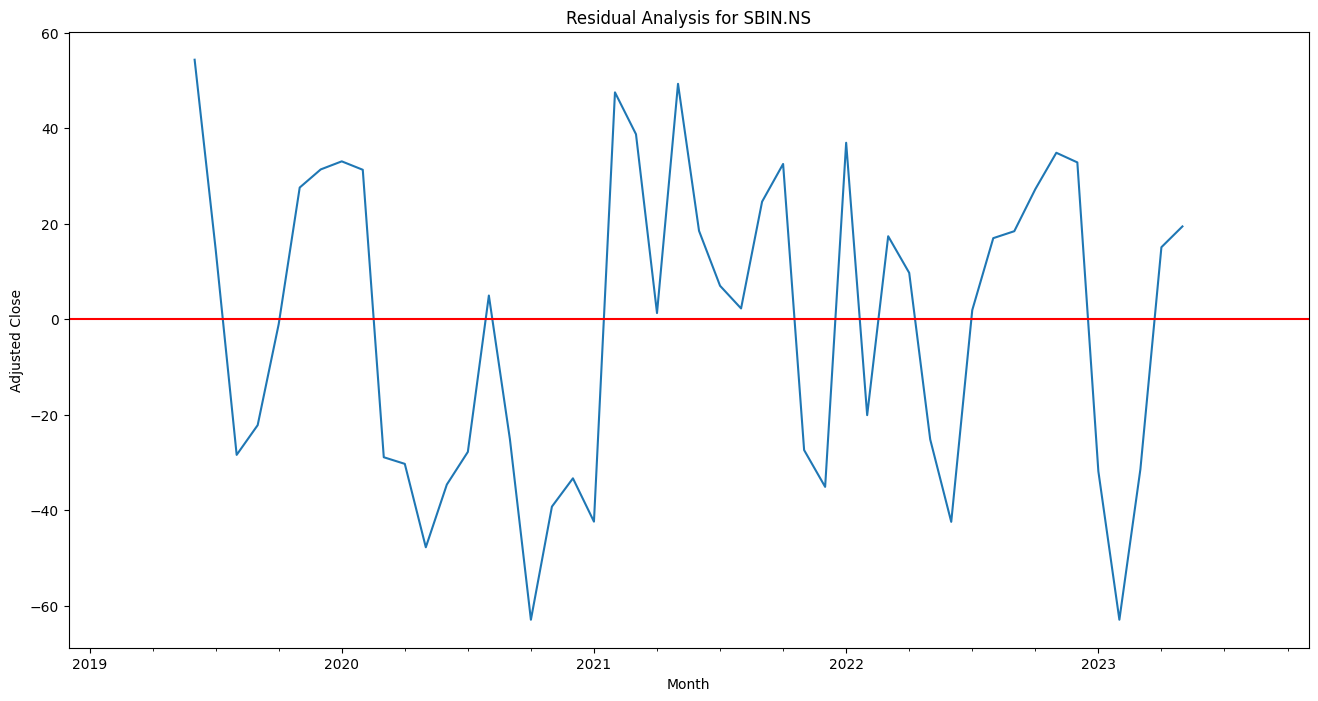

In [66]:
plt.figure(figsize=(16,8))
Q.resid.plot()
plt.axhline(color='red')
plt.xlabel('Month')
plt.ylabel('Adjusted Close')
plt.title(f'Residual Analysis for {ticker}')
plt.show()

### Train test split

In [67]:
n = int(0.8*len(df))
ytrain, ytest = df['Adj Close'][0:n+1], df['Adj Close'][n:]

In [68]:
ytrain.shape

(49,)

In [69]:
ytest.shape

(12,)

### Auto ARIMA

In [70]:
from pmdarima.arima import auto_arima

In [71]:
model = auto_arima(ytrain, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=489.637, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=484.444, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=484.527, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=484.519, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=484.044, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=482.610, Time=0.13 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=484.533, Time=0.22 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=484.536, Time=0.15 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=482.577, Time=0.12 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=484.534, Time=0.18 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=486.534, Time=0.23 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=484.531, Time=0.15 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=486.453, Time=0.31 sec
 ARIMA(0,1,0)(0,0,1)[12]             : AIC=483.195, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,1)

In [72]:
fp = len(df) - n - 1
fp

11

In [73]:
forecast, conf_level = model.predict(n_periods=fp, return_conf_int=True)

In [74]:
forecast

2023-01-01    587.714109
2023-02-01    604.268125
2023-03-01    615.542566
2023-04-01    625.349563
2023-05-01    637.108027
2023-06-01    644.856284
2023-07-01    633.441106
2023-08-01    642.340228
2023-09-01    650.160832
2023-10-01    641.249825
2023-11-01    643.930564
Freq: MS, dtype: float64

In [75]:
conf_level

array([[520.65515222, 654.77306502],
       [509.43243888, 699.10381012],
       [499.39304683, 731.69208601],
       [491.2316506 , 759.4674762 ],
       [487.15964244, 787.05641246],
       [480.59605769, 809.11650942],
       [456.01978426, 810.86242789],
       [452.66885697, 832.01159945],
       [448.9839632 , 851.33770161],
       [429.19078502, 853.3088645 ],
       [421.5211672 , 866.33996163]])

In [76]:
lower = conf_level[:, 0]
upper = conf_level[:, 1]

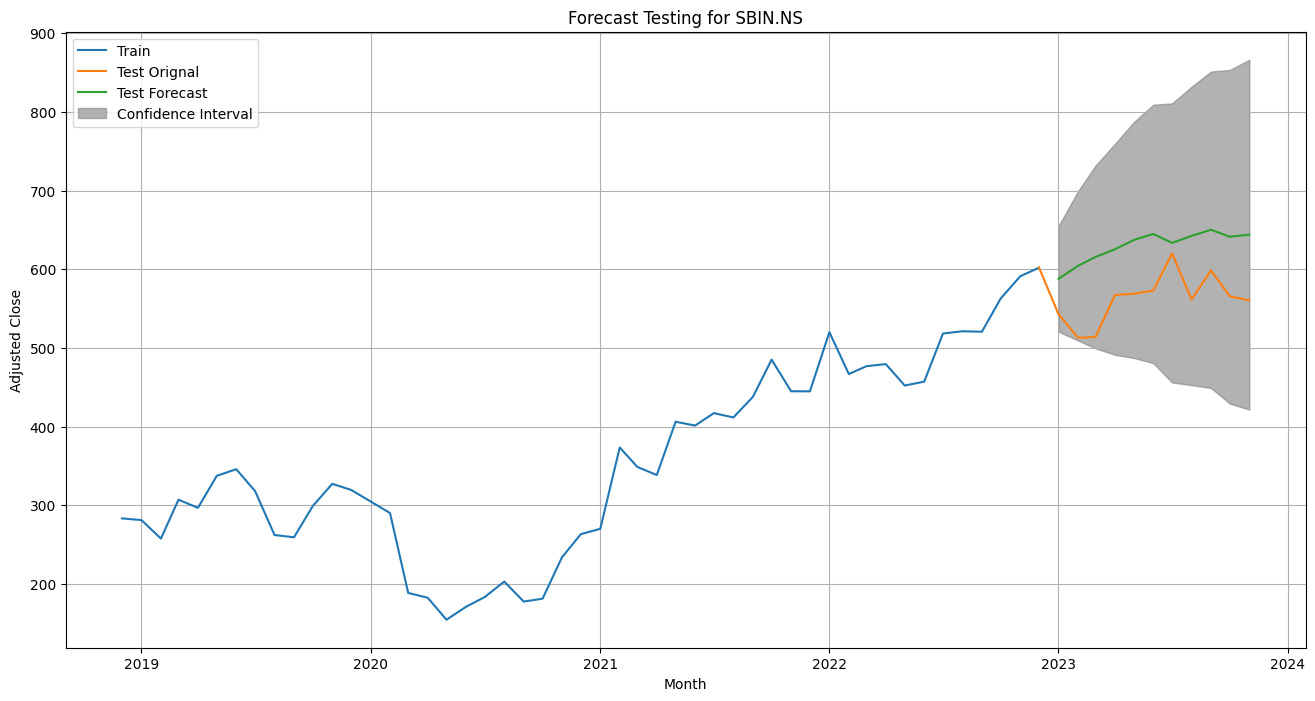

In [77]:
plt.figure(figsize=(16,8))
plt.plot(ytrain, label='Train')
plt.plot(ytest, label='Test Orignal')
plt.plot(forecast, label='Test Forecast')
plt.fill_between(forecast.index, lower, upper, color='gray', alpha=0.6, label='Confidence Interval')
plt.xlabel('Month')
plt.ylabel('Adjusted Close')
plt.title(f'Forecast Testing for {ticker}')
plt.legend(loc='upper left')
plt.grid()
plt.show()